### Install and import necessary libraries

In [2]:
!pip install pydriller
import pandas as pd
from pydriller import Repository

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 5.5 MB/s eta 0:00:00


### Loading the dataset

In [ ]:
import pandas as pd
results_df = pd.read_csv('Lab3_results.csv')

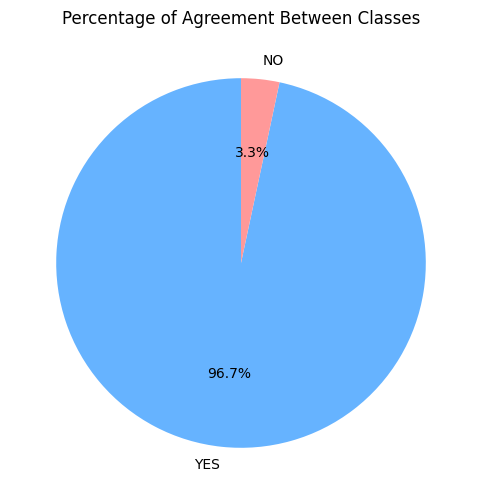

In [30]:
import matplotlib.pyplot as plt

# Count occurrences of YES and NO in Classes_Agree
agreement_counts = results_df['Classes_Agree'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(
    agreement_counts, 
    labels=agreement_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#66b3ff','#ff9999']
)
plt.title('Percentage of Agreement Between Classes')
plt.savefig("agreement.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()

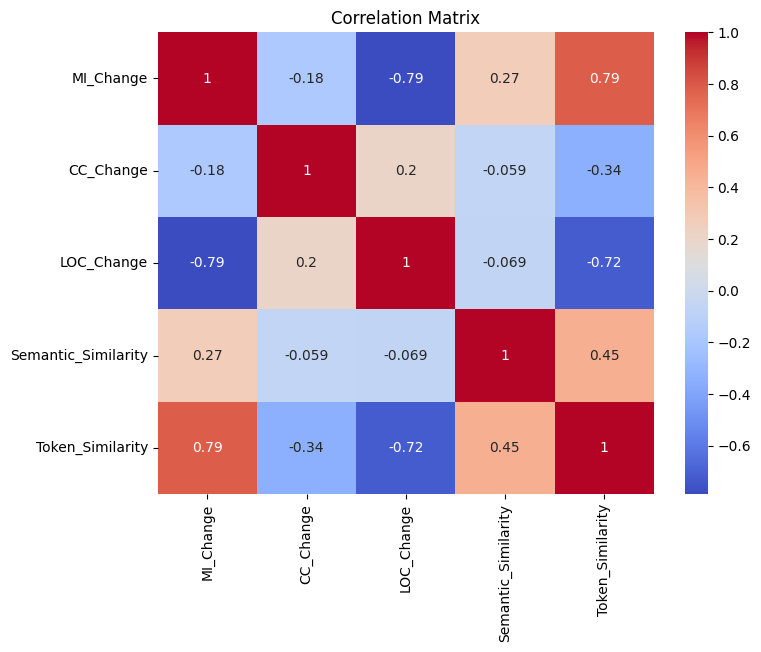

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(
    changes_df[["MI_Change","CC_Change","LOC_Change","Semantic_Similarity","Token_Similarity"]].corr(),
    annot=True, cmap="coolwarm"
)
plt.title("Correlation Matrix")

# Save with transparent background
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches="tight", transparent=True)

plt.show()

Largest MI increase: Commit fa95aa, MI_Change = 1.9123702060888943
Largest MI decrease: Commit dc0232, MI_Change = -5.862119232637514
Largest CC increase: Commit e0ccfa, CC_Change = 1.5
Largest CC decrease: Commit df554b, CC_Change = -0.8333333333333357


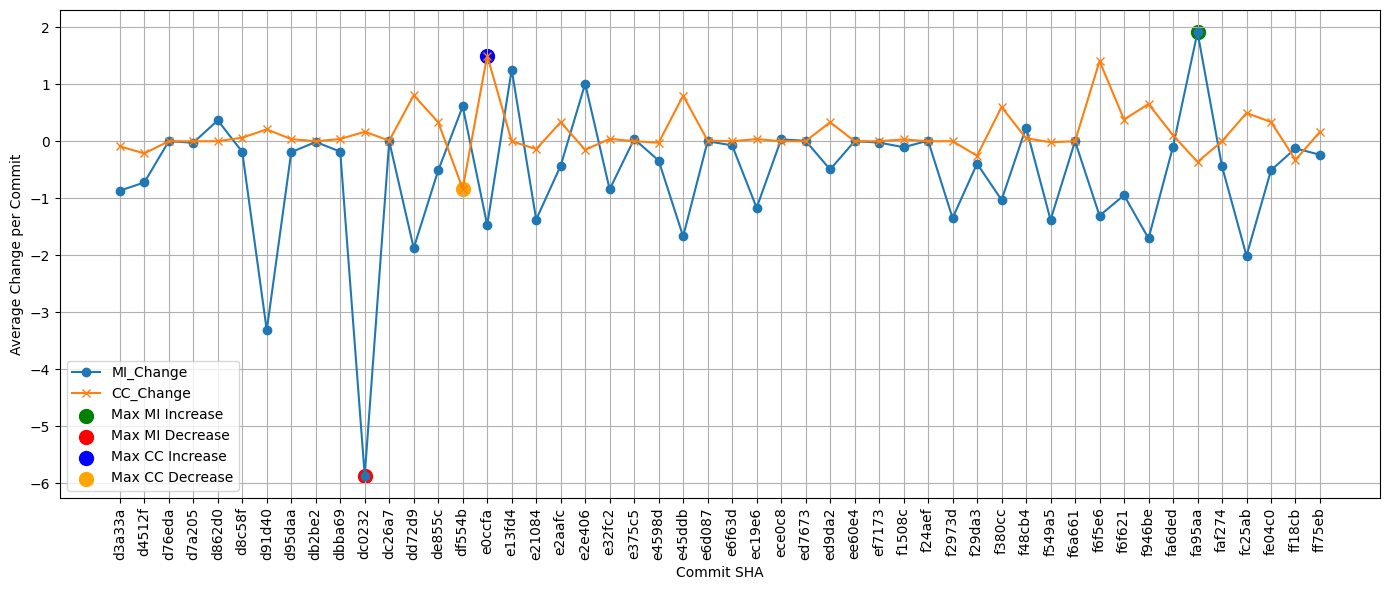

In [26]:
import matplotlib.pyplot as plt

# Aggregate per commit
commit_summary = results_df.groupby('Hash')[['MI_Change', 'CC_Change', 'LOC_Change']].mean().reset_index()
commit_summary = commit_summary.dropna(subset=['MI_Change', 'CC_Change'])
commit_summary = commit_summary.tail(50)  # last 50 commits
commit_summary['Short_SHA'] = commit_summary['Hash'].str[:6]

# Identify largest increases and decreases
max_mi = commit_summary.loc[commit_summary['MI_Change'].idxmax()]
min_mi = commit_summary.loc[commit_summary['MI_Change'].idxmin()]
max_cc = commit_summary.loc[commit_summary['CC_Change'].idxmax()]
min_cc = commit_summary.loc[commit_summary['CC_Change'].idxmin()]

print(f"Largest MI increase: Commit {max_mi['Short_SHA']}, MI_Change = {max_mi['MI_Change']}")
print(f"Largest MI decrease: Commit {min_mi['Short_SHA']}, MI_Change = {min_mi['MI_Change']}")
print(f"Largest CC increase: Commit {max_cc['Short_SHA']}, CC_Change = {max_cc['CC_Change']}")
print(f"Largest CC decrease: Commit {min_cc['Short_SHA']}, CC_Change = {min_cc['CC_Change']}")

# Plot
plt.figure(figsize=(14,6))
plt.plot(commit_summary['Short_SHA'], commit_summary['MI_Change'], marker='o', label='MI_Change')
plt.plot(commit_summary['Short_SHA'], commit_summary['CC_Change'], marker='x', label='CC_Change')

# Highlight largest changes
plt.scatter(max_mi['Short_SHA'], max_mi['MI_Change'], color='green', s=100, label='Max MI Increase')
plt.scatter(min_mi['Short_SHA'], min_mi['MI_Change'], color='red', s=100, label='Max MI Decrease')
plt.scatter(max_cc['Short_SHA'], max_cc['CC_Change'], color='blue', s=100, label='Max CC Increase')
plt.scatter(min_cc['Short_SHA'], min_cc['CC_Change'], color='orange', s=100, label='Max CC Decrease')

plt.xlabel('Commit SHA')
plt.ylabel('Average Change per Commit')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("commit_changes.png", dpi=300, bbox_inches="tight", transparent=True)
plt.show()

In [22]:
commit_summary

,Hash,MI_Change,CC_Change,LOC_Change,Short_SHA
285,d3a33a0dc3cabd3b3c0dba0255fb4919db44e3b5,-0.866775,-0.090476,0.000000,d3a33a
286,d4512f7c138a254d789fcba247b9c363a8aa2e25,-0.723239,-0.213513,20.714286,d4512f
288,d76eda4f66828d66aa6a1b01a0d03323e43810dd,0.000000,0.000000,1.333333,d76eda
289,d7a2057ca60f5281fbe8d6ae0ef3e15aed60a2d9,-0.025602,0.000000,1.333333,d7a205
290,d862d053ed7deb2275e47d2aec2f7cd587decf0e,0.365921,0.000000,1.000000,d862d0
292,d8c58fbbb7d59dfa13edba89c13301e60ccdbaf6,-0.186474,0.062029,3.000000,d8c58f
293,d91d40a7b6b556f2d1fdd3e1e430f7a76a799627,-3.313453,0.208333,62.000000,d91d40
294,d95daa06926e66b91447d464336e59bbf5b632b7,-0.192384,0.037037,3.666667,d95daa
295,db2be2346a4659d30102939a378e72a25d470a9f,-0.012137,0.000000,4.500000,db2be2
296,dbba69b085b9d6049b57b48b882af7e9f29df5b2,-0.182555,0.038462,2.000000,dbba69
